In [1]:
import pickle
from pprint import pprint # 예쁘게 출력
import pandas as pd

In [4]:
# 데이터를 불러옵니다
with open('data/cleaned_data.pk', 'rb') as f:
    data = pickle.load(f)

# 데이터 수정.
data.reset_index(inplace=True, drop=True) # drop=True: 기존 인덱스를 지움

# 데이터 확인.
print(data.info())
data.head()
# Int64Index: 22925 entries, 0 to 28885
# => 마지막에 line 날려줄 때 인덱스 업데이트가 안돼서 중간중간 비어져있어서 그럼 => 인덱스 업데이트하자!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22914 entries, 0 to 22913
Data columns (total 3 columns):
Date       22914 non-null object
User       22912 non-null object
Message    22914 non-null object
dtypes: object(3)
memory usage: 537.2+ KB
None


,Date,User,Message
0,2018. 5. 3. 00,주현,엥 결국 안먹음
1,2018. 5. 3. 00,주현,너 그 야구부 엠티는 가는거야 그래서
2,2018. 5. 3. 00,현영,안가
3,2018. 5. 3. 00,현영,근엄마한테갈거라고말해놓긴햇는디
4,2018. 5. 3. 00,현영,보내준다허면


In [5]:
set(data['User'])

{nan, nan, '영현 ', '주현 ', '주희 ', '지의 ', '지이 ', '현영 '}

In [6]:
# 사용자를 파악합니다.
users = set(data['User']) # 중복된 걸 지워줘
users

{nan, nan, '영현 ', '주현 ', '주희 ', '지의 ', '지이 ', '현영 '}

In [7]:
# 사용자별로 데이터를 묶습니다.
authors  = data.groupby('User')
pprint(authors.groups)
print('\n', type(authors.groups))
# 현재 authors.groups는 dictionary 형태

{'영현 ': Int64Index([  655,   738,   742,   743,   746,   747,   750,   752,   756,
              757,
            ...
            22857, 22880, 22881, 22882, 22894, 22898, 22899, 22900, 22901,
            22913],
           dtype='int64', length=3372),
 '주현 ': Int64Index([    0,     1,    42,    50,    86,    98,   104,   110,   111,
              113,
            ...
            22782, 22786, 22787, 22788, 22790, 22824, 22844, 22845, 22846,
            22861],
           dtype='int64', length=1205),
 '주희 ': Int64Index([   18,    19,    20,    26,    36,    39,    43,    53,    57,
               89,
            ...
            22837, 22843, 22850, 22852, 22870, 22871, 22873, 22874, 22877,
            22886],
           dtype='int64', length=3292),
 '지의 ': Int64Index([    7,    27,    28,    31,    37,    38,    45,    47,    48,
               49,
            ...
            22865, 22869, 22883, 22884, 22887, 22888, 22892, 22903, 22905,
            22912],
           dtype='int64', le

In [8]:
# 사용자별로 묶은 데이터를 사용 가능한 데이터 타입으로 바꿉니다.
author2doc = {}

for user, index in authors.groups.items(): # dict를 for문에 사용하려면 .items() 필요
    author2doc[user] = list(index)

author2doc

{'영현 ': [655,
  738,
  742,
  743,
  746,
  747,
  750,
  752,
  756,
  757,
  765,
  766,
  770,
  775,
  777,
  779,
  781,
  786,
  787,
  817,
  818,
  820,
  821,
  822,
  823,
  824,
  833,
  834,
  838,
  839,
  841,
  843,
  864,
  865,
  870,
  871,
  872,
  874,
  877,
  878,
  880,
  881,
  882,
  883,
  884,
  885,
  887,
  891,
  892,
  893,
  905,
  907,
  908,
  909,
  910,
  913,
  914,
  918,
  923,
  924,
  925,
  930,
  933,
  937,
  938,
  941,
  942,
  952,
  955,
  956,
  957,
  960,
  967,
  993,
  1041,
  1045,
  1047,
  1048,
  1052,
  1053,
  1081,
  1082,
  1091,
  1092,
  1103,
  1116,
  1117,
  1129,
  1136,
  1155,
  1164,
  1166,
  1168,
  1169,
  1187,
  1190,
  1191,
  1192,
  1195,
  1196,
  1198,
  1200,
  1203,
  1206,
  1210,
  1215,
  1229,
  1230,
  1232,
  1234,
  1238,
  1243,
  1251,
  1252,
  1255,
  1263,
  1264,
  1270,
  1273,
  1280,
  1298,
  1305,
  1310,
  1311,
  1380,
  1381,
  1385,
  1388,
  1392,
  1399,
  1406,
  1407,
  1408,
  1

In [9]:
# 첫번째 유저에 대한 카카오톡 내용 확인.
user1_msg = [str(data['Message'][idx]) for idx in author2doc['영현 ']]
# pandas object이기때문에 str을 씌워줘야 예쁘게 나옴
user1_msg

[' 나도 공결',
 ' 걍 다 가지말자',
 ' 헐',
 ' 밖에',
 ' 미친 천둥번개',
 ' 개무서워',
 ' 아니 날씨 왜이래 아아아아 무서워 ',
 ' 무서워아아',
 ' 미친',
 ' 언우박맞아썽',
 ' 아니 지이언니 왜 신났냐고 ',
 ' 아 또 천둥친다 ',
 ' 아미쳤냐고진짜 ',
 ' 헐',
 ' 진짜 언니 갇혀사는거아니지',
 ' 언니집이 제일 위험해 진짜',
 ' 밖에 핵날라와도 모르겠다 진짜 ',
 ' 아니',
 ' 천둥좀안치게해봐  밖에 나중에 어케낙냐고오오',
 ' 그니깐 우리도 지금시작',
 ' 난 몰빵에서 센이랑 문쓰발 하러공',
 ' 나방금 같이 사는 언니한테 들었느데',
 ' 인하대에서 술팔지말라는 그거 무시하고',
 ' 그냥 했다가',
 ' 인하대 회장 징역 5년이랑 막 3000만원인가 벌금 먹었대',
 ' 다른대학교들도 다 주점 안한대 아예 미쳐따',
 ' 흠',
 ' 난쉽게결정못하게써 ',
 ' 그건맞아또',
 ' 술 사와서 먹는건 된다고 하지만',
 ' 굳이',
 ' 앗 잠시',
 ' 헐',
 ' 에반데',
 ' 20분까지 봐주면',
 ' 아니',
 ' 들엉면',
 ' 봐준데',
 ' 아니',
 ' 근데 지금',
 ' 니깐',
 ' 그니깐',
 ' 얼굴 걍 찍히고 들어가는거잖아 ',
 ' 근데 결석 1번인데',
 ' 1번은',
 ' 괜찮지않을까',
 ' 20분에 부른대',
 ' 엥',
 ' 1번 결석',
 ' 크게 상관없지않냐',
 ' 아이폰6 케이스 쓰는사람없지 요기',
 ' 헐 진자',
 ' 아니 나 오늘 폰바꿨거든 언니 ',
 ' 근데 아이폰6 케이스 3개나 주문시켰따고 ',
 ' 언니 혹시  나한테 살 의향있으면 말해조',
 ' 구래 ',
 ' 잠만 보여주께',
 ' 해외배송이라 이미 거의 다 도착',
 ' 오오오옹',
 ' 아이폰x로 바꿨더',
 ' 155만원',
 ' 성공 와앙',
 ' 언니빼고 다 앉아있어',
 ' 아 ',
 ' 개웃겨 ',
 ' 아 개쪽팔릴 것 같애 ',
 ' 안니 그래서 아예 안들어오

#### 빈도 분석 (예전과 코드가 거의 같음)

In [10]:
# 전체 단어 분석을 위해 token들을 전부 모으기

import nltk # 빈도분석을 위한 라이브러리

# 갖고있는 모든 문서를 합쳐야(하나의 큰 리스트로) 전체 단어의 빈도분석이 가능하겠지
total_tokens = [token for doc in user1_msg for token in doc.split()]
print(len(total_tokens))

7001


In [11]:
text = nltk.Text(total_tokens, name='kakao')
print(len(set(text.tokens)))
pprint(text.vocab().most_common(10))

4611
[('아', 106),
 ('나', 94),
 ('근데', 87),
 ('난', 58),
 ('진짜', 55),
 ('나도', 51),
 ('야', 45),
 ('헐', 43),
 ('아니', 35),
 ('존나', 35)]


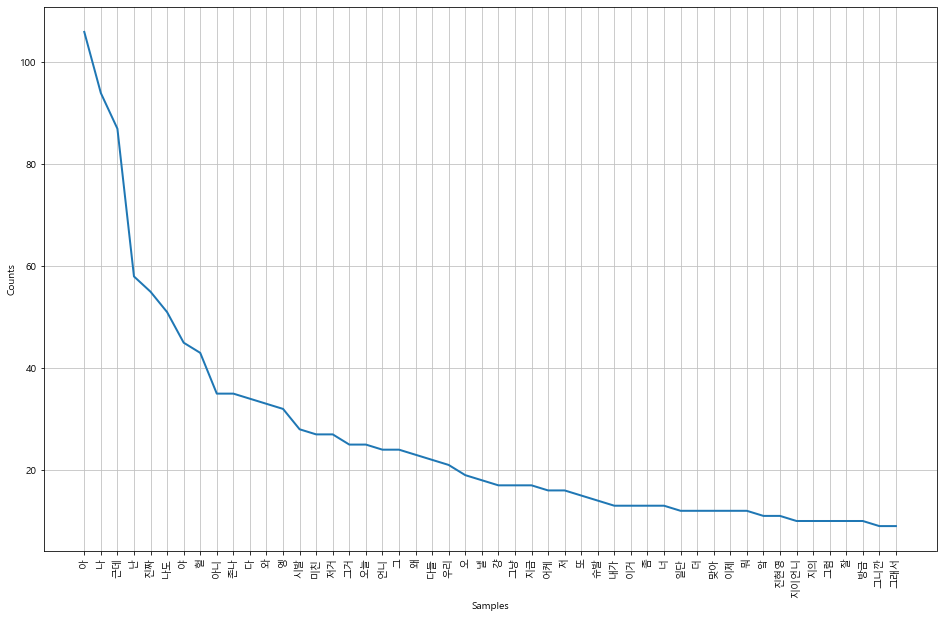

In [12]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

plt.figure(figsize=(16, 10))
text.plot(50)

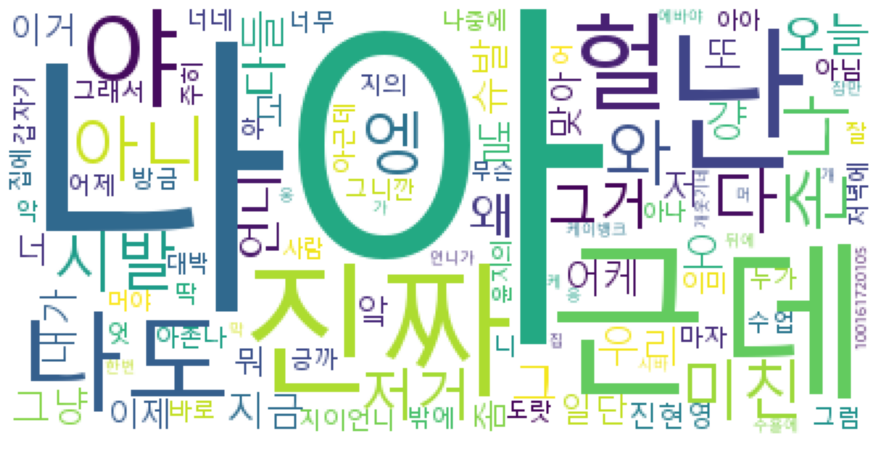

In [14]:
from wordcloud import WordCloud

wc = text.vocab().most_common(100)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(dict(wc))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### 빈도 분석 내용을 하나의 함수로 합치기

In [55]:
def user_freq_analysis(username, data, author2doc):
    
    user_msg = [str(data["Message"][idx]) for idx in author2doc[username]]
    total_tokens = [token for doc in user_msg for token in doc.split()]
    text = nltk.Text(total_tokens, name='kakao')

    #pprint(text.vocab().most_common(10))
    path = "c:/Windows/Fonts/malgun.ttf"
    if platform.system() == 'Darwin':
        rc('font', family='AppleGothic')
    elif platform.system() == 'Windows':
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
    else:
        print('Unknown system... sorry~~~~')

    plt.figure(figsize=(16, 10))
    text.plot(50)

    wc = text.vocab().most_common(100)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
    wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                          relative_scaling = 0.2,
                          #stopwords=STOPWORDS,
                          background_color='white',
                          ).generate_from_frequencies(dict(wc))
    plt.figure(figsize=(16,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

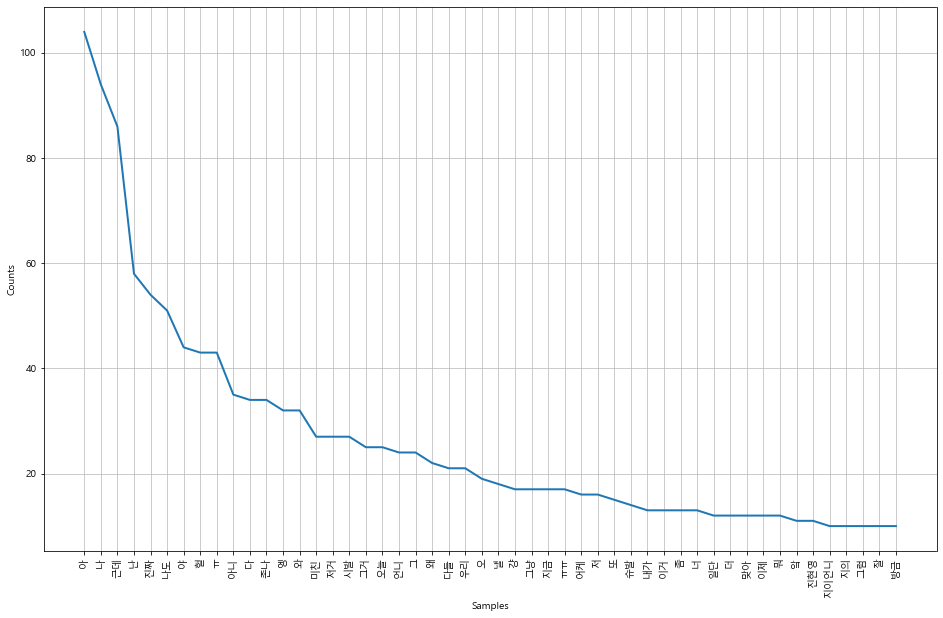

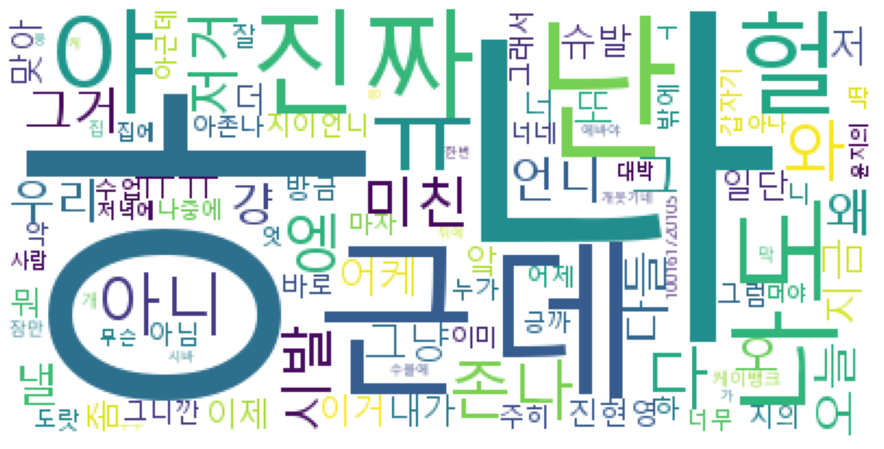

In [58]:
# 함수 테스트
user_freq_analysis('영현 ', data, author2doc)